<a href="https://colab.research.google.com/github/kunyoungPark/lab/blob/master/RNN(IMDB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 분류

## 데이터 준비


In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train_all.shape

(25000,)

In [ ]:
x_test.shape

(25000,)

In [ ]:
print(x_train_all[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
np.unique(y_train_all, return_counts=True)

(array([0, 1]), array([12500, 12500]))

In [ ]:
print(y_train_all[0])

1


In [ ]:
word_to_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
word_to_index['movie']

17

In [ ]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

In [ ]:
print(index_to_word[217],index_to_word[240],index_to_word[260],index_to_word[277] )

almost kind our once


In [ ]:
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
for i in range(1, 200):
  print(i, index_to_word[i])

1 the
2 and
3 a
4 of
5 to
6 is
7 br
8 in
9 it
10 i
11 this
12 that
13 was
14 as
15 for
16 with
17 movie
18 but
19 film
20 on
21 not
22 you
23 are
24 his
25 have
26 he
27 be
28 one
29 all
30 at
31 by
32 an
33 they
34 who
35 so
36 from
37 like
38 her
39 or
40 just
41 about
42 it's
43 out
44 has
45 if
46 some
47 there
48 what
49 good
50 more
51 when
52 very
53 up
54 no
55 time
56 she
57 even
58 my
59 would
60 which
61 only
62 story
63 really
64 see
65 their
66 had
67 can
68 were
69 me
70 well
71 than
72 we
73 much
74 been
75 bad
76 get
77 will
78 do
79 also
80 into
81 people
82 other
83 first
84 great
85 because
86 how
87 him
88 most
89 don't
90 made
91 its
92 then
93 way
94 make
95 them
96 too
97 could
98 any
99 movies
100 after
101 think
102 characters
103 watch
104 two
105 films
106 character
107 seen
108 many
109 being
110 life
111 plot
112 never
113 acting
114 little
115 best
116 love
117 over
118 where
119 did
120 show
121 know
122 off
123 ever
124 does
125 better
126 your
127 end
1

In [ ]:
len(index_to_word)

88584

In [ ]:
for i in range(88000, 88585):
  print(i, index_to_word[i])

88000 salmonella
88001 unzombiefied
88002 caiano's
88003 kamp
88004 'gideon'
88005 byrnes
88006 yappy
88007 resettled
88008 arrhythmically
88009 disburses
88010 deluca
88011 cucumber'
88012 tauted
88013 lacquer
88014 anthropophagous
88015 squirrelly
88016 rheubottom
88017 cucumbers
88018 deadhead
88019 tounge
88020 mcdonnel
88021 sbd
88022 hobbyhorse
88023 romerfeller
88024 fearfully
88025 vertebrae
88026 are't
88027 likeminded
88028 vining
88029 offisde
88030 amputate
88031 frankenhooker
88032 berta
88033 charlo
88034 tapioca
88035 'tess'
88036 storys'
88037 ivanek's
88038 immatured
88039 tarkovski's
88040 palest
88041 suberb
88042 ballad'
88043 whorl
88044 'girls'
88045 envirofascist
88046 howcome
88047 khakis
88048 feferman's
88049 sportage
88050 stanze's
88051 humpdorama
88052 'slight'
88053 pyrotics
88054 reestablishing
88055 sollipsism
88056 stemmin'
88057 whytefox
88058 reroutes
88059 mindfu
88060 littler
88061 batman
88062 bunuellian
88063 riki
88064 questionthat
88065 eratica

In [ ]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 1]

In [ ]:
for w in x_train_all[0]:
  print(index_to_word[w - 3], end=' ')

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be p

In [ ]:
print(len(x_train_all[0]), len(x_train_all[1]))

217 188


In [ ]:
reviews_length = [len(review) for review in x_train_all]
print(np.max(reviews_length), np.mean(reviews_length))

2493 237.71364


In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

In [ ]:
x_train_all[0]

[2,
 2,
 22,
 2,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 2,
 2,
 36,
 2,
 2,
 25,
 2,
 43,
 2,
 2,
 50,
 2,
 2,
 2,
 35,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 39,
 2,
 2,
 2,
 2,
 2,
 2,
 38,
 2,
 2,
 2,
 2,
 50,
 2,
 2,
 2,
 2,
 2,
 2,
 22,
 2,
 2,
 2,
 2,
 2,
 22,
 71,
 87,
 2,
 2,
 43,
 2,
 38,
 76,
 2,
 2,
 2,
 2,
 22,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 62,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 66,
 2,
 33,
 2,
 2,
 2,
 2,
 38,
 2,
 2,
 25,
 2,
 51,
 36,
 2,
 48,
 25,
 2,
 33,
 2,
 22,
 2,
 2,
 28,
 77,
 52,
 2,
 2,
 2,
 2,
 82,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 2,
 2,
 2,
 2,
 2,
 2,
 88,
 2,
 2,
 2,
 2,
 98,
 32,
 2,
 56,
 26,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 22,
 21,
 2,
 2,
 26,
 2,
 2,
 2,
 30,
 2,
 2,
 51,
 36,
 28,
 2,
 92,
 25,
 2,
 2,
 2,
 65,
 2,
 38,
 2,
 88,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 32,
 2,
 2,
 2,
 2,
 2,
 32]

In [ ]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2] #2로 flag된 것 제거 해주는 과정

In [ ]:
x_train_all[0]

[22,
 43,
 65,
 66,
 36,
 25,
 43,
 50,
 35,
 39,
 38,
 50,
 22,
 22,
 71,
 87,
 43,
 38,
 76,
 22,
 62,
 66,
 33,
 38,
 25,
 51,
 36,
 48,
 25,
 33,
 22,
 28,
 77,
 52,
 82,
 36,
 71,
 43,
 26,
 46,
 88,
 98,
 32,
 56,
 26,
 22,
 21,
 26,
 30,
 51,
 36,
 28,
 92,
 25,
 65,
 38,
 88,
 32,
 32]

In [ ]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [ ]:
reviews_length = [len(review) for review in x_train_all]
print(np.max(reviews_length), np.mean(reviews_length))

414 50.78556


In [ ]:
for w in x_train_all[0]:
  print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

## 순환 신경망

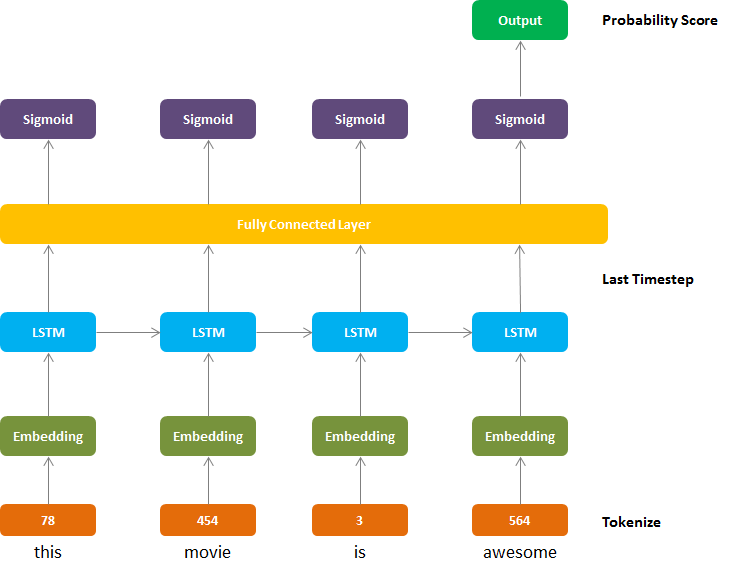

https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

np.random.seed(42)
random_index = np.random.permutation(25000)
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [ ]:
reviews_length = [len(review) for review in x_train]
print(np.max(reviews_length), np.mean(reviews_length), np.min(reviews_length))

862 112.02155 4


In [ ]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [ ]:
reviews_length = [len(review) for review in x_train_seq]
print(np.max(reviews_length), np.mean(reviews_length), np.min(reviews_length))

100 100.0 100


In [ ]:
len(x_train[0])

95

In [ ]:
x_train_seq[0]

array([  0,   0,   0,   0,   0, 225, 678, 200,  35, 204, 129, 629, 599,
       399,  40,  27, 768,  28, 224, 331, 917,  40,  22, 677,  83, 778,
        31, 103,  85, 702, 116,  45,  24, 196, 159, 369, 471,  23,  31,
       160,  70, 759,  31, 160,  76, 329, 181,  30, 172,  98,  32, 934,
       225, 813, 496, 863,  22, 100,  28, 952, 957, 329, 472,  51,  75,
       130,  56, 862, 105, 625, 186,  30, 168, 307,  33, 454,  97,  53,
       229,  38, 563, 529,  46, 414, 450, 117,  53,  74,  31,  35,  23,
       268,  34, 167,  22, 231, 450, 771, 798,  58], dtype=int32)

In [ ]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 328       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 56s 83ms/step - loss: 0.5251 - accuracy: 0.7519 - val_loss: 0.4788 - val_accuracy: 0.7854
Epoch 2/10
625/625 [==============================] - 45s 73ms/step - loss: 0.4220 - accuracy: 0.8194 - val_loss: 0.4383 - val_accuracy: 0.8056
Epoch 3/10
625/625 [==============================] - 47s 75ms/step - loss: 0.3712 - accuracy: 0.8448 - val_loss: 0.4156 - val_accuracy: 0.8238
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.3336 - accuracy: 0.8627 - val_loss: 0.4250 - val_accuracy: 0.8188
Epoch 5/10
625/625 [==============================] - 44s 71ms/step - loss: 0.3131 - accuracy: 0.8758 - val_loss: 0.4441 - val_accuracy: 0.8218
Epoch 6/10
625/625 [==============================] - 45s 71ms/step - loss: 0.2881 - accuracy: 0.8868 - val_loss: 0.4563 - val_accuracy: 0.8064
Epoch 7/10
625/625 [==============================] - 44s 71ms/step - loss: 0.2675 - accuracy: 0.8949 - val_loss: 0.4602 - val_accuracy:

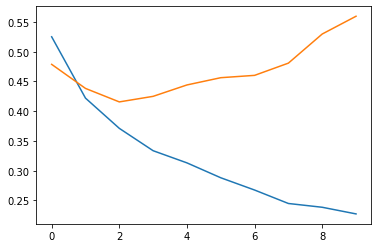

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

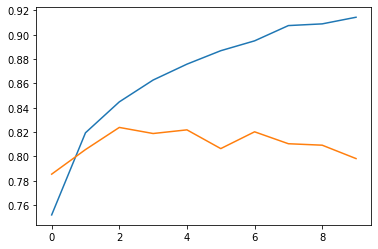

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.7982000112533569


## LSTM 순환 신경망

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 8)                 1312      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 9s 7ms/step - loss: 0.4459 - accuracy: 0.7987 - val_loss: 0.3660 - val_accuracy: 0.8452
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3289 - accuracy: 0.8604 - val_loss: 0.3547 - val_accuracy: 0.8470
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3053 - accuracy: 0.8709 - val_loss: 0.3629 - val_accuracy: 0.8506
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2887 - accuracy: 0.8785 - val_loss: 0.3677 - val_accuracy: 0.8444
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2732 - accuracy: 0.8864 - val_loss: 0.3663 - val_accuracy: 0.8372
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2594 - accuracy: 0.8902 - val_loss: 0.3951 - val_accuracy: 0.8394
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2503 - accuracy: 0.8951 - val_loss: 0.3786 - val_accuracy: 0.8324
Epoch 

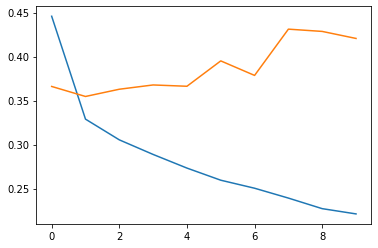

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

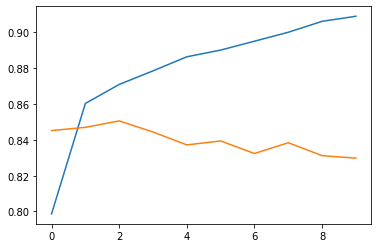

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.829800009727478


## GRU 순환 신경망

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model_gru = Sequential()

model_gru.add(Embedding(1000, 32))
model_gru.add(GRU(8))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 gru (GRU)                   (None, 8)                 1008      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,017
Trainable params: 33,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_gru.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 6s 7ms/step - loss: 0.4840 - accuracy: 0.7628 - val_loss: 0.4091 - val_accuracy: 0.8150
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3547 - accuracy: 0.8501 - val_loss: 0.3691 - val_accuracy: 0.8446
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3204 - accuracy: 0.8676 - val_loss: 0.3583 - val_accuracy: 0.8446
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3010 - accuracy: 0.8778 - val_loss: 0.3580 - val_accuracy: 0.8450
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2865 - accuracy: 0.8820 - val_loss: 0.3554 - val_accuracy: 0.8462
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2740 - accuracy: 0.8881 - val_loss: 0.3584 - val_accuracy: 0.8430
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2641 - accuracy: 0.8911 - val_loss: 0.3847 - val_accuracy: 0.8384
Epoch 

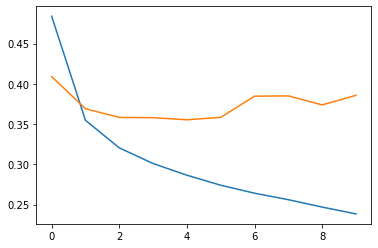

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

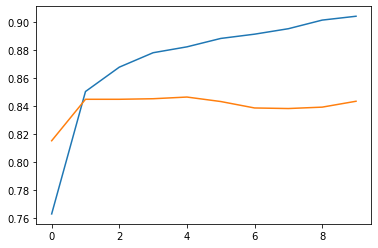

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model_gru.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8432000279426575
